In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import random

In [ ]:
ExE = pd.read_csv('../../../extracted_data/ExE_imputed_5.csv', sep = ',', index_col = 0)

R2:  -1.3190617159525702
RMSE: 0.1716804649468835


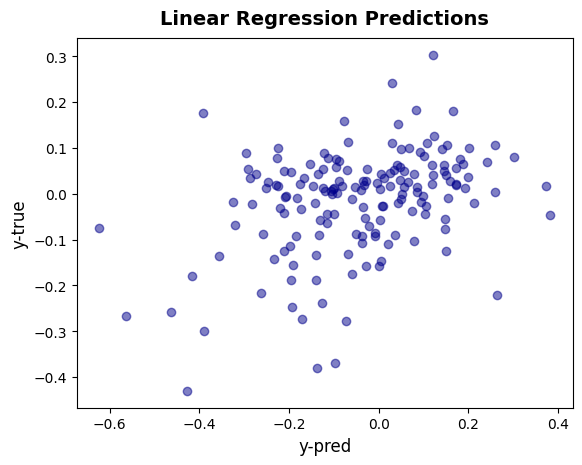

In [3]:
random.seed(36)

target_column = random.choice(ExE.columns)  # Randomly pick a column name

X = ExE.drop(columns=[target_column])  # Features (all columns except the target)
y = ExE[target_column]  # Target variable (the randomly selected column)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm = LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)

print('R2: ', lm.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(y_pred, y_test, alpha=0.5, c='darkblue')
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("Linear Regression Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()


try the same after Running PCA?

0.9196224976932448


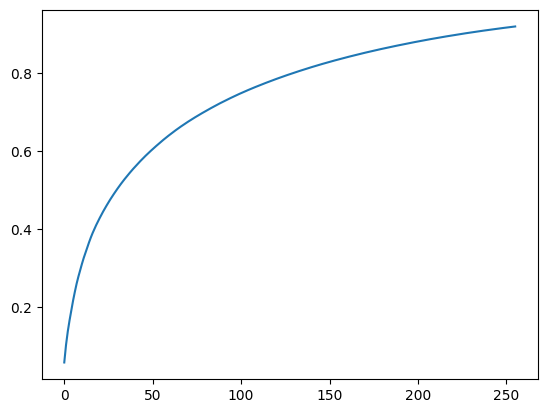

In [4]:
# Check what is the percentage of the variance explained by compressed data compared to the full data 
N=256
pca = PCA(n_components=N)
pca.fit_transform(X)
ev = pca.explained_variance_ratio_.cumsum()
print(ev[-1])
plt.plot(range(0, N), ev)

In [5]:
dims = 256
ExE_PCA = pd.DataFrame(PCA(n_components=dims).fit_transform(X))
ExE_PCA

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-0.038516,-0.086988,-0.372906,0.450569,0.014367,0.088683,0.432922,-0.438985,0.179086,-0.105345,...,-0.003797,0.073010,-0.007366,0.033130,0.039517,0.009849,-0.056510,-0.034511,0.026888,0.090082
1,-0.190793,-0.129365,-0.502221,0.449660,-0.173900,0.078295,0.534136,-0.529002,0.179545,0.113409,...,0.058265,-0.025115,0.042528,-0.025886,-0.067480,0.061120,-0.033485,0.075638,0.064837,-0.064383
2,-0.962322,-0.434401,0.100352,0.049402,0.060553,-0.163624,-0.020625,-0.116809,0.190834,0.182083,...,0.112805,-0.096081,-0.008292,-0.037699,-0.086324,-0.045623,0.006832,0.061801,-0.121063,0.012424
3,0.227869,-0.721560,-0.422033,0.970121,0.043940,-0.014287,0.503768,-0.157416,0.573130,-0.477627,...,-0.047090,0.007238,0.097480,0.066515,0.086649,0.025802,0.050447,-0.028773,0.017400,-0.018561
4,0.159497,0.178132,0.005512,0.210686,-0.245318,-0.290981,0.102888,0.171707,-0.152555,-0.230904,...,-0.012704,-0.038115,0.027347,-0.018606,0.082286,-0.013826,0.033177,-0.029792,0.016487,-0.038149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,-0.024283,0.117082,-0.047592,-0.167868,0.071508,0.219027,-0.004166,0.117414,-0.123192,0.104542,...,-0.026945,0.048361,0.054127,-0.047794,-0.001384,0.093578,-0.056530,-0.058557,0.048118,-0.056481
820,-0.057159,0.223576,0.134964,0.369993,-0.122981,0.311692,0.001770,-0.159429,0.066014,-0.090304,...,-0.032988,0.078033,-0.063635,-0.023995,0.020997,-0.016209,-0.001985,0.001207,0.027562,0.004120
821,-0.101556,0.356802,0.096513,0.300979,0.098793,0.524697,0.124907,-0.164578,0.174970,-0.002655,...,-0.038762,0.093528,-0.024887,0.000965,-0.056855,-0.027727,0.002562,-0.005815,0.054626,-0.006186
822,0.065831,0.073552,-0.020958,0.007192,0.152438,0.282653,0.109084,-0.028580,0.030909,-0.060203,...,-0.005021,0.039467,0.051820,-0.012658,-0.046985,0.039986,-0.049569,0.021974,0.053218,-0.032662


R2:  0.38369086142397
RMSE: 0.08850423067002794


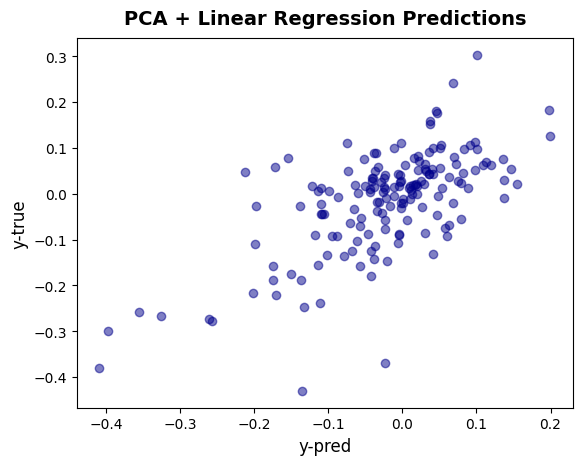

In [6]:
X_train, X_test, y_train, y_test = train_test_split(ExE_PCA, y, test_size=0.2, random_state=42)

lm = LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)


print('R2: ', lm.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


plt.scatter(y_pred, y_test, alpha=0.5, c='darkblue')
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("PCA + Linear Regression Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()

## Try other models

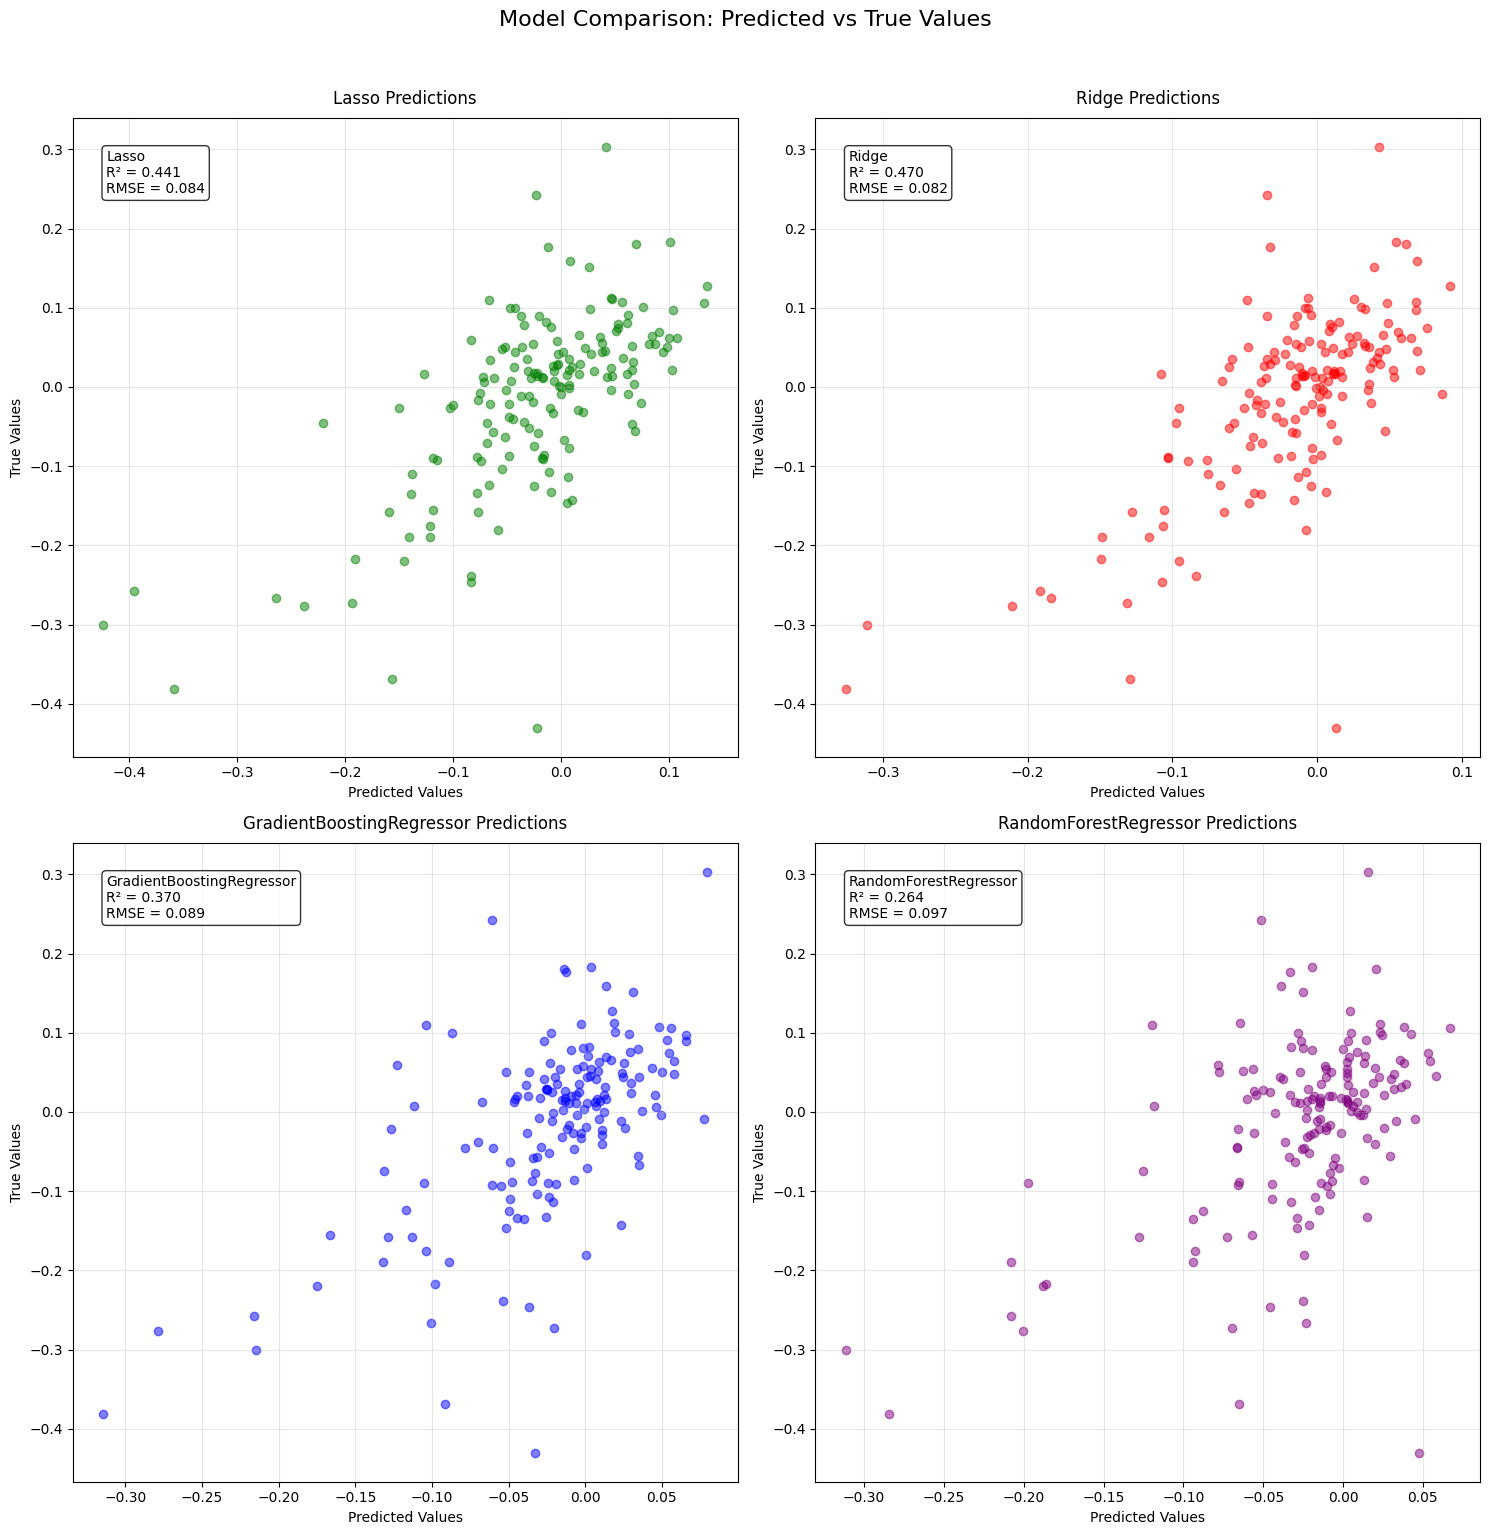

In [7]:
predictive_models = [  
                      Lasso(alpha=0.0001),
                      Ridge(alpha=10.0),
                      GradientBoostingRegressor(n_estimators=20, learning_rate=0.2, max_depth=3, random_state=48),
                      RandomForestRegressor(n_estimators=20, random_state=42)
]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Model Comparison: Predicted vs True Values', fontsize=16, y=1.02)

axes = axes.ravel()

colors = ['green', 'red', 'blue', 'purple']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for idx, (model, ax, color) in enumerate(zip(predictive_models, axes, colors)):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    ax.scatter(y_pred, y_test, alpha=0.5, color=color)
        
    model_name = model.__class__.__name__
    ax.text(0.05, 0.95, 
            f'{model_name}\nR² = {r2:.3f}\nRMSE = {rmse:.3f}',
            transform=ax.transAxes,
            verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('True Values')
    ax.set_title(f'{model_name} Predictions', pad=10)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.4337e-04 - mse: 9.4337e-04 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0847e-04 - mse: 5.0847e-04 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1563e-04 - mse: 3.1563e-04 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3173e-04 - mse: 2.3173e-04 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0493e-04 - mse: 2.0493e-04 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━

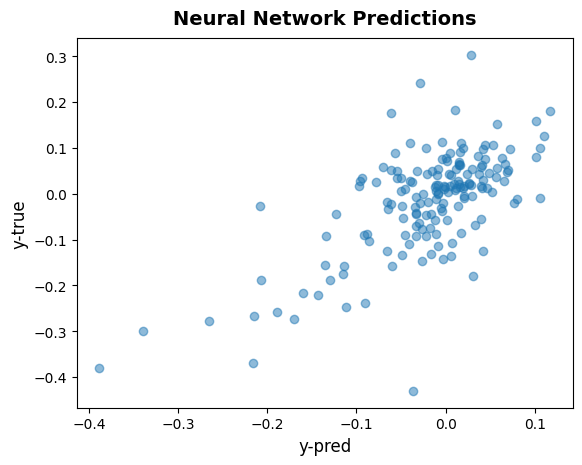

In [8]:
# And Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

loss, mae = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
print('R2:', r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(y_pred, y_test, alpha=0.5)
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("Neural Network Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()